Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Shape of train data is: (7352, 563)
Shape of test data is: (2947, 563)
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675    

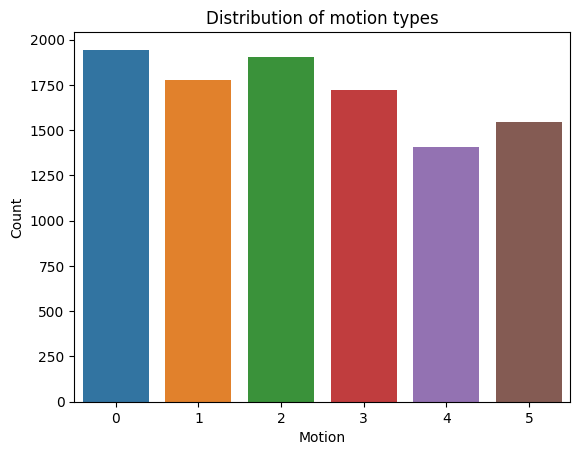

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64
Number of unique classes in the target labels: 6
Number of classes in training set: 6
Number of classes in test set: 6
Number of unique classes in the entire dataset: 6


<ipython-input-3-85171082f53f>:151: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  models.append(("NN", KerasClassifier(build_fn=lambda: create_nn_model(input_dim=X_train.shape[1], num_classes=num_classes), epochs=5)))


DT: 0.8297
RF: 0.9358
65/65 [==============================] - 0s 1ms/step
NN: 0.9723


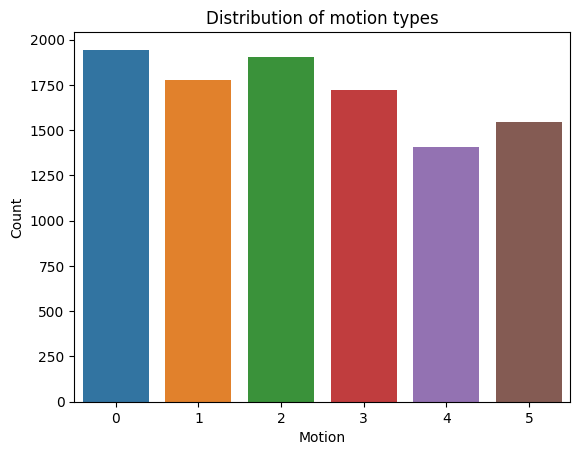

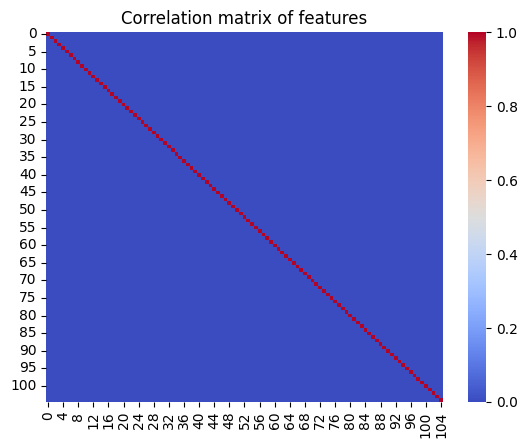

<ipython-input-3-85171082f53f>:226: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  models.append(("NN", KerasClassifier(build_fn=lambda: create_nn_model(input_dim=X_train.shape[1], num_classes=num_classes), epochs=5)))


DT: 0.8256
RF: 0.9374
65/65 [==============================] - 0s 1ms/step - loss: 0.0796 - accuracy: 0.9743
NN: 0.9743
The best model is NN with an accuracy score of 0.9743
65/65 [==============================] - 0s 1ms/step
Accuracy: 0.9743
Precision: 0.9752
Recall: 0.9755
F1-score: 0.9753


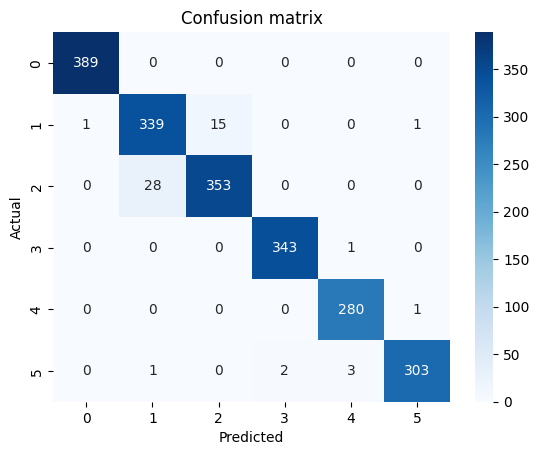

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       0.92      0.95      0.94       356
           2       0.96      0.93      0.94       381
           3       0.99      1.00      1.00       344
           4       0.99      1.00      0.99       281
           5       0.99      0.98      0.99       309

    accuracy                           0.97      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.97      0.97      0.97      2060

The best model is already a neural network, no need for hyperparameter tuning.
1/1 [==============================] - 0s 78ms/step
The predicted motion type is: [[9.9999970e-01 3.5135291e-17 0.0000000e+00 2.1885029e-12 1.9946540e-07
  1.7161248e-16]
 [9.9999994e-01 2.5023229e-18 0.0000000e+00 2.0124177e-15 2.3100096e-11
  2.9260210e-21]
 [9.9999994e-01 3.8639062e-19 0.0000000e+00 2.5485580e-15 2.0087393e-12
  7.9863454e-20]
 [9.9999994e-01 6.0960543e-19

In [3]:
!pip install scikeras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import save_model, load_model



# Load data from Human Activity Recognition with Smartphones dataset
# Load data from Human Activity Recognition with Smartphones dataset
train_path = 'train.csv'
test_path = 'test.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Encode the 'Activity' column using LabelEncoder
label_encoder = LabelEncoder()
train_data["Activity"] = label_encoder.fit_transform(train_data["Activity"])
test_data["Activity"] = label_encoder.transform(test_data["Activity"])

# Check for classes in the test set that are not in the training set
missing_classes = set(test_data["Activity"].unique()) - set(train_data["Activity"].unique())

# Remove rows with missing classes from the test set
if missing_classes:
    test_data = test_data[~test_data["Activity"].isin(missing_classes)]

# Combine the train and test data
df = pd.concat([train_data, test_data])

print(f'Shape of train data is: {train_data.shape}\nShape of test data is: {test_data.shape}')

# Display first five rows of data
print(df.head())

# Exploratory data analysis
# Plot the distribution of target classes
sns.countplot(x=df['Activity'], data=df)
plt.title("Distribution of motion types")
plt.xlabel("Motion")
plt.ylabel("Count")
plt.show()

# Data preprocessing
# Drop irrelevant columns if they exist
columns_to_drop = ["Unnamed: 0", "time"]
df.drop([col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)


# Check for missing values
df.isnull().sum()

# Check for duplicate rows
df.duplicated().sum()

# Separate features (X) and target (y)
X = df.iloc[:, :-1]  # Exclude 'Activity' column
y = df['Activity']

# Check for missing values
print(df.isnull().sum())

# Impute missing values using SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Scale and normalize features using StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality and select most important features
pca = PCA(n_components=0.95)
reduced_X = pca.fit_transform(scaled_X)

# Now you can use 'reduced_X' and 'y' in your machine learning models

# Split data into features (X) and target (y)
X = pd.DataFrame(reduced_X)
y = df["Activity"]

# Find the number of unique classes in the entire dataset
num_classes = len(np.unique(y))
print('Number of unique classes in the target labels:', num_classes)

# Check the number of samples per class
class_counts = y.value_counts()

# Find classes with less than 2 samples
classes_to_remove = class_counts[class_counts < 2].index

# Remove rows with these classes from the data
if not classes_to_remove.empty:
    mask = ~y.isin(classes_to_remove)
    X = X[mask]
    y = y[mask]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


n_classes_train = np.unique(y_train).shape[0]
n_classes_test = np.unique(y_test).shape[0]

print(f"Number of classes in training set: {n_classes_train}")
print(f"Number of classes in test set: {n_classes_test}")
# One-hot encode the target labels
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)


# Get the number of unique classes in the target labels
num_classes = len(np.unique(y))
print('Number of unique classes in the entire dataset:', num_classes)



# Define a function to create a neural network model with two hidden layers and a dropout layer
def create_nn_model(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


...

# Create a list of machine learning algorithms to compare
models = []
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("NN", KerasClassifier(build_fn=lambda: create_nn_model(input_dim=X_train.shape[1], num_classes=num_classes), epochs=5)))

# Create an empty list to store the results of each model
results = []

# Loop through each model and evaluate its performance using 10-fold cross-validation
y_train_nn = to_categorical(y_train, num_classes=num_classes)
y_test_nn = to_categorical(y_test, num_classes=num_classes)


# Loop through each model and evaluate its performance using 10-fold cross-validation
for name, model in models:
    if name == "NN":
        # Fit the neural network model on the training data
        model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, verbose=0)
        
        # Predict the target classes for the testing data
        y_pred = model.predict(X_test)
        
        # Calculate the accuracy score
        accuracy = accuracy_score(np.argmax(y_test_one_hot, axis=1), y_pred)
        
        # Append the results to the list
        results.append((name, accuracy))
        
        # Print the name and accuracy score of the neural network model
        print(f"{name}: {accuracy:.4f}")
    else:
        # Perform 10-fold cross-validation and calculate the mean accuracy score
        cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
        
        # Append the results to the list
        results.append((name, cv_results.mean()))
        
        # Print the name and mean accuracy score of each model
        print(f"{name}: {cv_results.mean():.4f}")



# Exploratory data analysis
# Plot the distribution of target classes
activity_df = pd.DataFrame(y, columns=["Activity"])
sns.countplot(x="Activity", data=activity_df)
plt.title("Distribution of motion types")
plt.xlabel("Motion")
plt.ylabel("Count")
plt.show()

# Plot the correlation matrix of features
sns.heatmap(pd.DataFrame(X).corr(), cmap="coolwarm")
plt.title("Correlation matrix of features")
plt.show()

# Feature engineering
# Define a function to create new features based on existing ones
def create_features(X):
    # Calculate the mean, standard deviation, and skewness of each feature across all samples
    mean_features = np.mean(X, axis=0)
    std_features = np.std(X, axis=0)
    skew_features = pd.DataFrame(X).skew(axis=0)

    # Create a DataFrame with the new features
    new_features = pd.DataFrame(
        np.column_stack((mean_features, std_features, skew_features)),
        columns=["mean", "std", "skew"],
    )

    return new_features


# Create a list of machine learning algorithms to compare
models = []
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
# Pass the model parameters and fitting parameters separately
models.append(("NN", KerasClassifier(build_fn=lambda: create_nn_model(input_dim=X_train.shape[1], num_classes=num_classes), epochs=5)))

# Create an empty list to store the results of each model
results = []

# Loop through each model and evaluate its performance using 10-fold cross-validation
for name, model in models:
    if name == "NN":
        # Fit the neural network model on the training data
        model.fit(X_train, to_categorical(y_train), epochs=10, batch_size=32, verbose=0)
        # Evaluate the model on the test data
        accuracy = model.score(X_test, to_categorical(y_test))
        results.append((name, model, accuracy))
        print(f"{name}: {accuracy:.4f}")
    else:
        # Perform 10-fold cross-validation and calculate the mean accuracy score
        cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
        # Append the results to the list
        results.append((name, model, cv_results.mean()))
        # Print the name and mean accuracy score of each model
        print(f"{name}: {cv_results.mean():.4f}")



# Compare the results of different models and select the best one
best_model = max(results, key=lambda x: x[2])
print(f"The best model is {best_model[0]} with an accuracy score of {best_model[2]:.4f}")

# Model evaluation

# Predict the target classes for the testing data
y_pred = best_model[1].predict(X_test)

# Calculate and print the evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")

# Plot and print the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

# Model selection and hyperparameter tuning
# Model selection and hyperparameter tuning
if best_model[0] != "NN":
    # Define a dictionary of hyperparameters to tune for the best model
    params = {"max_depth": [3, 5, 7], "min_samples_split": [2, 4, 6], "n_estimators": [100, 200, 300]}

    # Perform grid search to find the optimal combination of hyperparameters
    grid = GridSearchCV(best_model[1], params, cv=10, scoring="accuracy")
    grid.fit(X_train, y_train)

    # Print the best hyperparameters and score
    print(f"The best hyperparameters are: {grid.best_params_}")
    print(f"The best score is: {grid.best_score_:.4f}")

    # Update the best model to be the best_estimator_ from GridSearchCV
    best_model = (best_model[0], grid.best_estimator_, grid.best_score_)
else:
    print("The best model is already a neural network, no need for hyperparameter tuning.")


# Model deployment and integration
# Save the best model
if best_model[0] == "NN":
    save_model(best_model[1].model, "model.h5")
else:
    pickle.dump(best_model[1], open("model.pkl", "wb"))

# Load the model
if best_model[0] == "NN":
    model = load_model("model.h5")
else:
    model = pickle.load(open("model.pkl", "rb"))


# Integrate the model into the smartwatch's software using a simple function
def classify_motion(data):
    # Preprocess the data using the same steps as before
    scaled_data = scaler.transform(data)
    pca_data = pca.transform(scaled_data)
    
    # Predict the motion type using the model
    prediction = model.predict(pca_data)
    
    # Return the prediction
    return prediction


# Testing and validation
# Simulate some sensor data for testing purposes
test_data = np.random.rand(10, df.shape[1] - 1)

# Classify the test data using the function
test_prediction = classify_motion(test_data)

# Print the test prediction
print(f"The predicted motion type is: {test_prediction}")

   
